In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
df = pd.read_csv('/Users/rileydouglas/Downloads/Research_final.csv')
df.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,1,3,39,5,1,3,12691,777,...,0,0,1,0,0,0,1,0,0,0
1,1,49,0,5,44,6,1,2,8256,864,...,0,1,0,0,0,0,1,0,0,0
2,1,51,1,3,36,4,1,0,3418,0,...,0,1,0,0,0,0,1,0,0,0
3,1,40,0,4,34,3,4,1,3313,2517,...,0,0,1,0,0,0,1,0,0,0
4,1,40,1,3,21,5,1,0,4716,0,...,0,0,0,0,1,0,1,0,0,0
5,1,44,1,2,36,3,1,2,4010,1247,...,0,1,0,0,0,0,1,0,0,0
6,1,51,1,4,46,6,1,3,34516,2264,...,0,0,0,0,0,1,0,1,0,0
7,1,32,1,0,27,2,2,2,29081,1396,...,0,0,1,0,0,0,0,0,0,1
8,1,37,1,3,36,5,2,0,22352,2517,...,0,0,0,0,1,0,1,0,0,0
9,1,48,1,2,36,6,3,3,11656,1677,...,0,1,0,0,0,0,1,0,0,0


In [8]:
df.sample(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
3530,1,42,1,4,33,5,1,3,9442,838,...,0,0,1,0,0,0,1,0,0,0
1876,1,39,0,2,34,4,3,4,2594,0,...,0,1,0,0,0,0,1,0,0,0
5665,1,49,0,3,36,3,1,3,4476,1492,...,0,0,1,0,0,0,1,0,0,0
1850,1,59,0,0,49,5,2,3,1479,601,...,0,0,0,1,0,0,1,0,0,0
8804,1,45,1,3,33,2,3,3,9303,1580,...,0,0,0,0,1,0,1,0,0,0
10082,1,29,1,1,20,3,1,2,16496,1409,...,0,0,0,0,0,1,0,0,0,1
2762,1,42,1,2,32,4,2,2,26222,1073,...,1,0,0,0,0,0,1,0,0,0
395,1,42,1,3,36,3,1,0,9599,1554,...,0,0,0,0,1,0,1,0,0,0
7685,1,44,0,3,33,5,3,1,8064,2417,...,0,0,0,0,0,1,1,0,0,0
7864,0,42,0,1,36,5,3,2,2705,2430,...,0,0,1,0,0,0,1,0,0,0


In [9]:
df.dtypes

Attrition_Flag                    int64
Customer_Age                      int64
Gender                            int64
Dependent_count                   int64
Months_on_book                    int64
Total_Relationship_Count          int64
Months_Inactive_12_mon            int64
Contacts_Count_12_mon             int64
Credit_Limit                      int64
Total_Revolving_Bal               int64
Avg_Open_To_Buy                   int64
Total_Amt_Chng_Q4_Q1              int64
Total_Trans_Amt                   int64
Total_Trans_Ct                    int64
Total_Ct_Chng_Q4_Q1               int64
Avg_Utilization_Ratio             int64
Marital_Status_Divorced           int64
Marital_Status_Married            int64
Marital_Status_Single             int64
Marital_Status_Unknown            int64
Income_Category_$120K +           int64
Income_Category_$40K - $60K       int64
Income_Category_$60K - $80K       int64
Income_Category_$80K - $120K      int64
Income_Category_Less than $40K    int64


In [10]:
# Preprocess the data
X = df.drop('Attrition_Flag', axis=1)  
y = df['Attrition_Flag']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8963474827245804

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.52      0.62       327
           1       0.91      0.97      0.94      1699

    accuracy                           0.90      2026
   macro avg       0.84      0.74      0.78      2026
weighted avg       0.89      0.90      0.89      2026



2024-04-24 13:24:55.510424: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Text(95.72222222222221, 0.5, 'Truth')

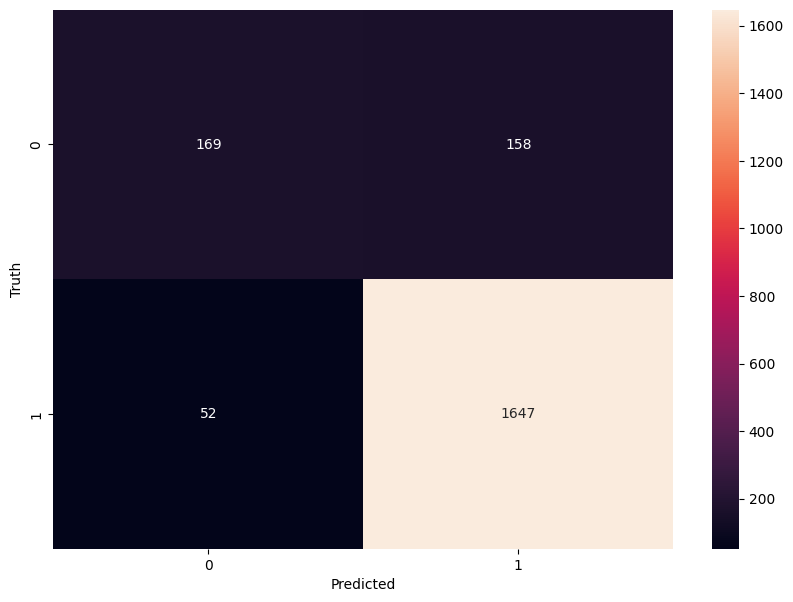

In [13]:
import tensorflow as tf 
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

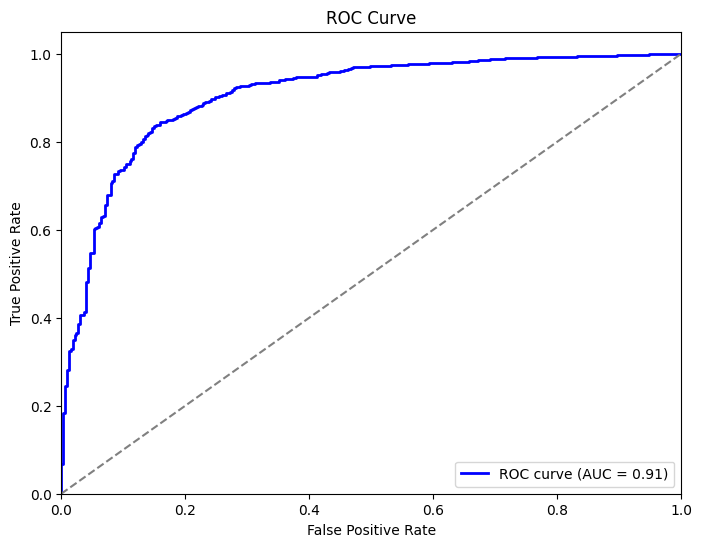

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate predicted probabilities for the test set
y_probs = model.predict_proba(X_test)
# Extract probabilities for the positive class
y_probs_positive = y_probs[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Calculate AUC score
auc = roc_auc_score(y_test, y_probs_positive)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()